In [ ]:
Basic Operations on Images

Learn to:

>>Access pixel values and modify them
>>Access image properties
>>Setting Region of Image (ROI)
>>Splitting and Merging images

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops

In [1]:
#Accessing Image Properties
%matplotlib notebook 
import cv2

import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('image1.jpg')

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [2]:
newimg = cv2.resize(img,(600,600))

cv2.imshow('image',newimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
print("shape img = ",img.shape)
print("size img = ",img.size)
print("type img = ",img.dtype)
print("shape newimg = ",newimg.shape)
print("size newimg = ",newimg.size)
print("type newimg = ",newimg.dtype)

shape img =  (1960, 1960, 3)
size img =  11524800
type img =  uint8
shape newimg =  (600, 600, 3)
size newimg =  1080000
type newimg =  uint8


In [4]:
N=200
print(newimg[0:5,0:10,0])
print("")
print(newimg[0:5,0:10,1])
print("")
print(newimg[0:5,0:10,2])
#cv2.imshow('image',newimg[0:250,0:250,2])
newimg1=cv2.applyColorMap(newimg[0:250,0:250,2],cv2.COLORMAP_SUMMER)
cv2.imshow('image',newimg1)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[58 58 58 59 54 56 55 58 57 55]
 [60 56 57 58 54 60 57 57 57 58]
 [57 58 58 57 57 61 57 60 57 57]
 [58 57 59 56 59 56 59 58 59 55]
 [58 56 59 59 58 58 57 55 59 55]]

[[104 104 102 104 101 101 100 102 101  99]
 [106 101 102 103 100 104 101 102 101 101]
 [105 103 103 102 101 104 101 104 101 101]
 [104 102 103 100 103 100 103 102 104  99]
 [103 103 103 103 102 102 101  99 103 100]]

[[158 159 159 161 155 158 157 156 155 153]
 [160 157 159 160 154 158 155 155 155 156]
 [157 158 160 157 155 157 154 157 155 154]
 [158 159 160 154 157 154 157 155 156 152]
 [160 159 159 157 156 155 154 152 156 152]]


In [5]:
#Splitting and Merging Image Channels

b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))
b.shape
b1 = img[:,:,0]
print(b[1:10,1:10])
print("")
print(b1[1:10,1:10])

[[58 59 58 58 59 58 56 60 56]
 [59 59 58 58 59 59 57 56 56]
 [60 60 58 57 58 58 58 56 56]
 [61 60 58 56 57 58 57 57 58]
 [60 60 57 55 56 58 58 57 57]
 [59 59 56 54 56 58 59 58 57]
 [58 58 55 54 56 59 60 59 57]
 [57 58 61 61 58 56 55 59 60]
 [57 58 60 59 57 57 58 60 58]]

[[58 59 58 58 59 58 56 60 56]
 [59 59 58 58 59 59 57 56 56]
 [60 60 58 57 58 58 58 56 56]
 [61 60 58 56 57 58 57 57 58]
 [60 60 57 55 56 58 58 57 57]
 [59 59 56 54 56 58 59 58 57]
 [58 58 55 54 56 59 60 59 57]
 [57 58 61 61 58 56 55 59 60]
 [57 58 60 59 57 57 58 60 58]]


blue: [ 54  53  54 ..., 118 118 110]
green: [ 98  97  98 ..., 130 130 120]
red: [151 150 151 ..., 148 148 138]


<IPython.core.display.Javascript object>


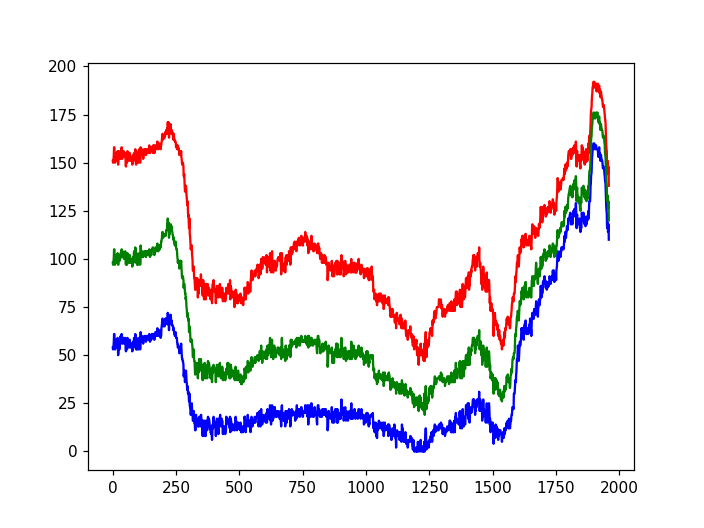

In [6]:
# accessing only blue pixel
blue = img[:,100,0]
print("blue:",blue)
# accessing only green pixel
green = img[:,100,1]
print("green:",green)
# accessing only red pixel
red = img[:,100,2]
print("red:",red)
import matplotlib.pyplot as plt
%matplotlib notebook 
plt.plot(blue,c='b')
plt.plot(red,c='r')
plt.plot(green,c='g')

In [7]:
# accessing RED value
print(img.item(10,10,2))

# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)


155


100

In [8]:
#Image ROI

roi = img[780:1140, 730:1190]
cv2.imshow('image',roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#Image Blending

img1 = img[200:600+200, 200:600+200]
img2 = img[400:800+200, 400:800+200]

dst = cv2.addWeighted(img1,0.7,img2,0.3,-100)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
#Translation
import cv2
import numpy as np


rows,cols = newimg[:,:,0].shape

M = np.float32([[1,0,50],[0,1,-50]])


dst = cv2.warpAffine(newimg,M,(cols,rows))
dst1 = cv2.addWeighted(newimg,0.7,dst,0.3,0)
dst = cv2.warpAffine(newimg,M,(cols,rows))
dst2 = cv2.addWeighted(dst1,0.7,dst,0.3,0)


cv2.imshow('img',dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
#Rotation


rows,cols = newimg[:,:,0].shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
dst = cv2.warpAffine(newimg,M,(cols,rows))

dst1 = cv2.addWeighted(newimg,1,dst,1,0)

newimg1=cv2.applyColorMap(dst1,cv2.COLORMAP_JET)
cv2.imshow('img',newimg1)

cv2.waitKey(0)
cv2.destroyAllWindows()

Smoothing Images
Learn to:
Blur imagess with various low pass filters
Apply custom-made filters to images (2D convolution)

<IPython.core.display.Javascript object>


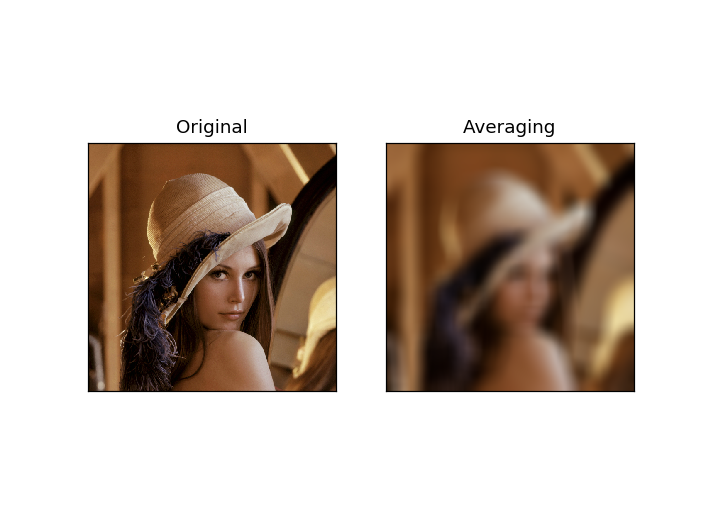

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook 

N=40
kernel = np.ones((N,N),np.float32)/(N**2)
dst = cv2.filter2D(newimg,-1,kernel)

plt.subplot(121),plt.imshow(cv2.cvtColor(newimg, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
kernel

<IPython.core.display.Javascript object>


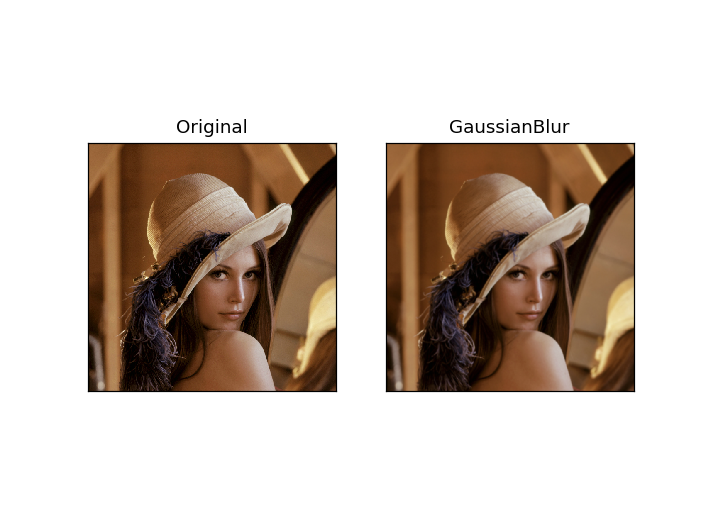

In [20]:
#Gaussian Filtering
%matplotlib notebook 
blur = cv2.GaussianBlur(newimg,(5,5),0)
plt.subplot(121),plt.imshow(cv2.cvtColor(newimg, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#Median Filtering
median = cv2.medianBlur(newimg,5)